In [150]:
import pandas as pd
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage.draw import circle, line_aa, polygon
import json

from skimage.io import imread
import pylab as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [13]:
data1 = pd.read_csv('fasion-resize-annotation-test-pure.csv', sep=':')

In [14]:
data1

,name,keypoints_y,keypoints_x
0,fashionWOMENShortsid0000074801_2side.jpg,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,fashionWOMENTees_Tanksid0000508545_1front.jpg,"[40, 85, 90, 147, 210, 82, 141, 199, 205, -1, ...","[88, 89, 56, 49, 35, 124, 129, 111, 58, -1, -1..."
2,fashionWOMENPantsid0000217503_7additional.jpg,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,fashionWOMENDressesid0000491905_2side.jpg,"[24, 48, 49, 92, 126, 47, -1, -1, 117, 174, 22...","[102, 84, 78, 78, 91, 91, -1, -1, 86, 86, 85, ..."
4,fashionWOMENTees_Tanksid0000298802_7additional...,"[36, 82, 81, 141, 202, 83, 148, 207, 195, -1, ...","[87, 88, 51, 41, 43, 122, 128, 144, 68, -1, -1..."
...,...,...,...
4033,fashionWOMENSweatersid0000029105_1front.jpg,"[33, 68, 65, 124, 184, 69, 122, 168, 173, 248,...","[89, 89, 58, 49, 63, 119, 126, 124, 72, 58, -1..."
4034,fashionWOMENBlouses_Shirtsid0000427405_7additi...,"[32, 81, 83, 153, 216, 80, 150, 210, 205, -1, ...","[67, 94, 131, 130, 143, 57, 53, 39, 118, -1, -..."
4035,fashionWOMENTees_Tanksid0000772134_2side.jpg,"[42, 72, 72, 145, 206, 73, -1, -1, 208, -1, -1...","[97, 76, 91, 104, 127, 60, -1, -1, 98, -1, -1,..."
4036,fashionWOMENTees_Tanksid0000603301_3back.jpg,"[42, 79, 81, -1, -1, 79, 145, 209, 205, -1, -1...","[76, 107, 126, -1, -1, 88, 73, 54, 120, -1, -1..."


In [10]:
data2 = pd.read_csv('fasion-resize-pairs-test-pure.csv')

In [11]:
data2

,from,to
0,fashionWOMENBlouses_Shirtsid0000337203_3back.jpg,fashionWOMENBlouses_Shirtsid0000337203_2side.jpg
1,fashionMENTees_Tanksid0000730104_7additional.jpg,fashionMENTees_Tanksid0000730104_1front.jpg
2,fashionWOMENShortsid0000513803_4full.jpg,fashionWOMENShortsid0000513803_1front.jpg
3,fashionWOMENDressesid0000713204_4full.jpg,fashionWOMENDressesid0000713204_3back.jpg
4,fashionWOMENBlouses_Shirtsid0000153001_3back.jpg,fashionWOMENBlouses_Shirtsid0000153001_4full.jpg
...,...,...
8565,fashionWOMENTees_Tanksid0000671302_4full.jpg,fashionWOMENTees_Tanksid0000671302_3back.jpg
8566,fashionWOMENCardigansid0000122903_1front.jpg,fashionWOMENCardigansid0000122903_7additional.jpg
8567,fashionWOMENBlouses_Shirtsid0000308204_1front.jpg,fashionWOMENBlouses_Shirtsid0000308204_7additi...
8568,fashionWOMENTees_Tanksid0000584009_1front.jpg,fashionWOMENTees_Tanksid0000584009_7additional...


In [33]:
df = pd.DataFrame(np.array([['2_1.jpeg', '2_2.jpeg']]),
                   columns=['from', 'to'])

In [35]:
df.to_csv('pairs.csv', index=False)

# Pose images

In [216]:
LIMB_SEQ = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7], [1,8], [8,9],
           [9,10], [1,11], [11,12], [12,13], [1,0], [0,14], [14,16],
           [0,15], [15,17], [2,16], [5,17]]

COLORS = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0],
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255],
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]


LABELS = ['nose', 'neck', 'Rsho', 'Relb', 'Rwri', 'Lsho', 'Lelb', 'Lwri',
               'Rhip', 'Rkne', 'Rank', 'Lhip', 'Lkne', 'Lank', 'Leye', 'Reye', 'Lear', 'Rear']

MISSING_VALUE = -1


def map_to_cord(pose_map, threshold=0.1):
    all_peaks = [[] for i in range(18)]
    pose_map = pose_map[..., :18]

    y, x, z = np.where(np.logical_and(pose_map == pose_map.max(axis = (0, 1)),
                                     pose_map > threshold))
    for x_i, y_i, z_i in zip(x, y, z):
        all_peaks[z_i].append([x_i, y_i])

    x_values = []
    y_values = []

    for i in range(18):
        if len(all_peaks[i]) != 0:
            x_values.append(all_peaks[i][0][0])
            y_values.append(all_peaks[i][0][1])
        else:
            x_values.append(MISSING_VALUE)
            y_values.append(MISSING_VALUE)

    return np.concatenate([np.expand_dims(y_values, -1), np.expand_dims(x_values, -1)], axis=1)


def cords_to_map(cords, img_size, sigma=6):
    result = np.zeros(img_size + cords.shape[0:1], dtype='float32')
    for i, point in enumerate(cords):
        if point[0] == MISSING_VALUE or point[1] == MISSING_VALUE:
            continue
        xx, yy = np.meshgrid(np.arange(img_size[1]), np.arange(img_size[0]))
        result[..., i] = np.exp(-((yy - point[0]) ** 2 + (xx - point[1]) ** 2) / (2 * sigma ** 2))
    return result


def draw_pose_from_cords(pose_joints, img_size, radius=2, draw_joints=True):
    colors = np.zeros(shape=img_size + (3, ), dtype=np.uint8)
    mask = np.zeros(shape=img_size, dtype=bool)

    if draw_joints:
        for f, t in LIMB_SEQ:
            from_missing = pose_joints[f][0] == MISSING_VALUE or pose_joints[f][1] == MISSING_VALUE
            to_missing = pose_joints[t][0] == MISSING_VALUE or pose_joints[t][1] == MISSING_VALUE
            if from_missing or to_missing:
                continue
            yy, xx, val = line_aa(pose_joints[f][0], pose_joints[f][1], pose_joints[t][0], pose_joints[t][1])
            colors[yy, xx] = np.expand_dims(val, 1) * 255
            mask[yy, xx] = True

    for i, joint in enumerate(pose_joints):
        if pose_joints[i][0] == MISSING_VALUE or pose_joints[i][1] == MISSING_VALUE:
            continue
        yy, xx = circle(joint[0], joint[1], radius=radius, shape=img_size)
        colors[yy, xx] = COLORS[i]
        mask[yy, xx] = True

    return colors, mask


def draw_pose_from_map(pose_map, threshold=0.1, **kwargs):
    cords = map_to_cord(pose_map, threshold=threshold)
    return draw_pose_from_cords(cords, pose_map.shape[:2], **kwargs)


def load_pose_cords_from_strings(y_str, x_str):
    y_cords = json.loads(y_str)
    x_cords = json.loads(x_str)
    return np.concatenate([np.expand_dims(y_cords, -1), np.expand_dims(x_cords, -1)], axis=1)

def mean_inputation(X):
    X = X.copy()
    for i in range(X.shape[1]):
        for j in range(X.shape[2]):
            val = np.mean(X[:, i, j][X[:, i, j] != -1])
            X[:, i, j][X[:, i, j] == -1] = val
    return X

def draw_legend():
    handles = [mpatches.Patch(color=np.array(color) / 255.0, label=name) for color, name in zip(COLORS, LABELS)]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def produce_ma_mask(kp_array, img_size, point_radius=2):
    from skimage.morphology import dilation, erosion, square
    mask = np.zeros(shape=img_size, dtype=bool)
    limbs = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10],
              [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17],
               [1,16], [16,18], [2,17], [2,18], [9,12], [12,6], [9,3], [17,18]]
    limbs = np.array(limbs) - 1
    for f, t in limbs:
        from_missing = kp_array[f][0] == MISSING_VALUE or kp_array[f][1] == MISSING_VALUE
        to_missing = kp_array[t][0] == MISSING_VALUE or kp_array[t][1] == MISSING_VALUE
        if from_missing or to_missing:
            continue

        norm_vec = kp_array[f] - kp_array[t]
        norm_vec = np.array([-norm_vec[1], norm_vec[0]])
        norm_vec = point_radius * norm_vec / np.linalg.norm(norm_vec)


        vetexes = np.array([
            kp_array[f] + norm_vec,
            kp_array[f] - norm_vec,
            kp_array[t] - norm_vec,
            kp_array[t] + norm_vec
        ])
        yy, xx = polygon(vetexes[:, 0], vetexes[:, 1], shape=img_size)
        mask[yy, xx] = True

    for i, joint in enumerate(kp_array):
        if kp_array[i][0] == MISSING_VALUE or kp_array[i][1] == MISSING_VALUE:
            continue
        yy, xx = circle(joint[0], joint[1], radius=point_radius, shape=img_size)
        mask[yy, xx] = True

    mask = dilation(mask, square(5))
    mask = erosion(mask, square(5))
    return mask

In [217]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

def draw_keypoints(kps, verbose=False):
    lines = [(0,1),(1,2),(2,6),(6,3),(3,4),(4,5),(6,7),(7,8),(8,9),(10,11),(11,12),(12,7),(7,13),(13,14),(14,15)]
    pose_dict = {0: 'right_ankle',
        1: 'right_knee',
        2: 'right_hip',
        3: 'left_hip',
        4: 'left_knee',
        5: 'left_ankle',
        6: 'pelvis',
        7: 'thorax',
        8: 'upper_neck',
        9: 'head_top',
        10: 'right_wrist',
        11: 'right_elbow',
        12: 'right_shoulder',
        13: 'left_shoulder',
        14: 'left_elbow',
        15: 'left_wrist'}

    joints = []
    for i in range(len(kps)):
        joint = kps[i]
        joint_x = joint[0]*(-1)
        joint_y = joint[1]*(-1)
        #if (joint_x > 0):
        plt.scatter(joint_x, joint_y, s=10, c='red', marker='o', label=i)
        if (verbose):
            plt.annotate(pose_dict[i], (joint_x, joint_y))
        
    for l in lines:
        j1 = kps[l[0]]
        j2 = kps[l[1]]
        #if (j1[0] > 0 and j2[0] > 0):
        x = [j1[0]*(-1), j2[0]*(-1)]
        y = [j1[1]*(-1), j2[1]*(-1)]
        plt.plot(x, y)
    
    return plt

In [218]:
df = pd.read_csv('./fasion-resize-annotation-test.csv', sep=':')

/home/furiousteabag/Projects/envs/base/lib/python3.6/site-packages/ipykernel_launcher.py:66: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
/home/furiousteabag/Projects/envs/base/lib/python3.6/site-packages/ipykernel_launcher.py:125: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19


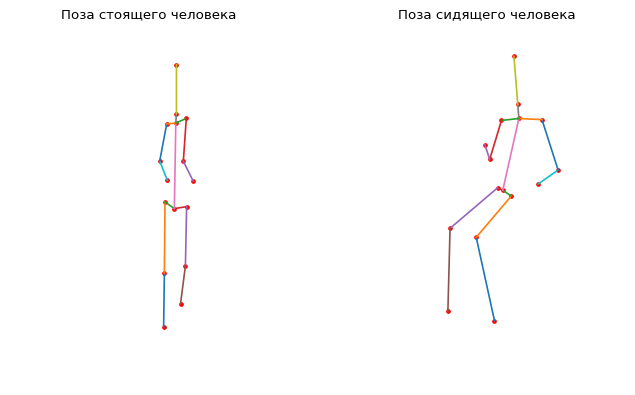

In [472]:
for index, row in df.iterrows():
    if index == 16:
        pose_cords = load_pose_cords_from_strings(row['keypoints_y'], row['keypoints_x'])
        colors, mask = draw_pose_from_cords(pose_cords, (256, 226))

        mmm = produce_ma_mask(pose_cords, (256, 226)).astype(float)[..., np.newaxis].repeat(3, axis=-1)
        img = imread('./test/' + row['name'])

        mmm[mask] = colors[mask]
        
#         plt.figure(figsize=(8, 6), dpi=80)
        
#         ax=plt.subplot(131)
#         ax.set_xlim(0, 100)
#         ax.set_ylim(0, 50)
#         ax.text(0, 0, 'asd', fontsize=10)
        
#         plt.subplot(132)
#         plt.imshow(mmm)

#         plt.subplot(133)
#         plt.imshow(img)
#         plt.show()

        gs = gridspec.GridSpec(1, 2)
        pl.figure(figsize=(10, 6), dpi=80)
        
        
        ax = pl.subplot(gs[0, 0]) 
        plt.title('Поза стоящего человека')
        plt.axis('off')
        plt.xlim([-1, 0])
        plt.ylim([-1.5, 0.5])
        plt = draw_keypoints([[ 0.44770265,  1.1688784 ],
[ 0.44509452,  0.8707067 ],
[ 0.44293144,  0.47885814],
[ 0.36619216,  0.5050523 ],
[ 0.37043908,  0.83196074],
[ 0.3877847 ,  1.0397714 ],
[ 0.4096774 ,  0.5151411 ],
[ 0.40454844,  0.04353511],
[ 0.4023789 , -0.00867897],
[ 0.4022741 , -0.27890955],
[ 0.4346607,   0.35950475],
[ 0.4616713 ,  0.2527098 ],
[ 0.436849  ,  0.04867999],
[ 0.36723602,  0.01750147],
[ 0.3778938 ,  0.25397286],
[ 0.34293057,  0.36329868]])
        
        
        ax = pl.subplot(gs[0, 1]) 
        plt.title('Поза сидящего человека')
        plt.axis('off')
        plt.xlim([-1, 0])
        plt.ylim([-1, 0])
        plt = draw_keypoints([[0.47371, 0.8172],
        [0.5386, 0.58692],
        [0.4143, 0.4732],
        [0.4629, 0.45048],
        [0.6314, 0.5621],
        [0.6391, 0.7909],
        [0.4443, 0.4570],
        [0.3872, 0.2591],
        [0.3911, 0.2203],
        [0.4048, 0.0877],
        [0.3191, 0.4400],
        [0.2480, 0.4014],
        [0.3052, 0.2622],
        [0.4491, 0.2645],
        [0.4907, 0.3720],
        [0.5077, 0.3318]])
        
        pl.savefig('./poll/poses.png')

In [ ]:
x = [[[ -0.77477118,  1.4456865 ],
       [ -0.5284266 ,  0.9593926 ],
       [ -0.07364669,  0.5814984 ],
       [ -0.2202488 ,  0.6623508 ],
       [ -0.6704511 ,  1.1398685 ],
       [ -0.7679139 ,  1.44553316],
       [ -0.05157312,  0.85563725],
       [ -0.25592488,  0.29918742],
       [ -0.5602761 ,  0.14015949],
       [ -0.5745679 , -0.03390069],
       [ -0.43009089,  0.4286179 ],
       [ -0.5742852 ,  0.50474735],
       [ -0.38132178,  0.12708741],
       [ -0.37118186,  0.2859969 ],
       [ -0.54078287,  0.3623907 ],
       [ -0.344933  ,  0.5777989 ]], [[-1.86421674, 1.3755622 ],
       [-1.33160415, 1.110896  ],
       [-1.03084   , 0.7449107 ],
       [-1.3163754 , 0.44186875],
       [-1.23266395, 1.1201913 ],
       [-1.6853543 , 1.3436928 ],
       [-1.1606612 , 0.68214864],
       [-0.78570026, 0.42315707],
       [-0.78213954, 0.37217215],
       [-0.8798758 , 0.18939498],
       [-0.71319944, 0.6927336],
       [-0.6581863 , 0.334078  ],
       [-0.49924583, 0.42623332],
       [-0.59917927, 0.39531153],
       [-0.5146699 , 0.50747454],
       [-0.3784471 , 0.403825  ]], [[0.40433362, 0.8080987 ],
       [0.3994659 , 0.6064245 ],
       [0.4228636 , 0.48161215],
       [0.68345  , 0.4574704 ],
       [0.47779974, 0.57363945],
       [0.5420048 , 0.6641186 ],
       [0.3988275 , 0.44993174],
       [0.46788734, 0.23400396],
       [0.48104876, 0.04073326],
       [0.48624298, 0.0541086 ],
       [0.47422317, 0.40493855],
       [1.184636  , 0.11767815],
       [0.3169284 , 0.22604065],
       [0.6155987 , 0.1781225 ],
       [0.60929996, 0.34952435],
       [0.35885635, 0.53619653]],
    [[0.38055643, 0.90790224],
       [0.3126876 , 0.7616102 ],
       [0.2568786 , 0.5921851 ],
       [1.2716272 , 0.45146552],
       [0.38586634, 0.7301772 ],
       [0.5607772 , 1.1919259 ],
       [0.36748645, 0.55282146],
       [0.3116652 , 0.12510502],
       [0.34954903, 0.00307588],
       [0.5209434, 0.056197697],
       [0.20377491, 0.39523742],
       [0.52829   , 0.38830066],
       [0.49425164, 0.2069564 ],
       [0.57351583, 0.13247359],
       [0.5996134 , 0.11161577],
       [0.60160166, 0.21305802]]]